In [105]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [146]:
def dist(point1,point2):
    return np.sum((point1-point2)**2)
def assign_centroid(point,centroids,k):
    d = dist(point,centroids[:,0])
    ind = 0
    for i in range(1,k):
        temp_d = dist(point,centroids[:,i])
        if d > temp_d:
            d = temp_d
            ind = i
    return ind, d
def k_menas(points,k):
    p_size = points.shape[1]
    mu = np.mean(points,axis=1).reshape([2,-1])
    std = np.std(points,axis=1).reshape([2,-1])
    centroids = (np.random.randn(2,k))*std + mu
    plt.figure(figsize=(8,8))
    plt.plot(mu[0,0],mu[1,0],'y^',label='mu')
    plt.plot(points[0,:],points[1,:],'.',label='Points')
    plt.plot(centroids[0,:],centroids[1,:],'+',label='Initial Centroids')
    old_total_cost = 0
    total_cost = 0
    while(1):
        new_centroids = np.zeros((2,k))
        cnt = np.zeros((2,k))
        old_total_cost = total_cost
        total_cost = 0
        D = 0
        for i in range(p_size):
            ind,cost = assign_centroid(points[:,i],centroids,k)
            new_centroids[:,ind] += points[:,i]
            cnt[:,ind] += 1
            total_cost += cost
            D += np.sqrt(cost)
        zr = np.where(cnt==0)[1]
        cnt[:,zr] = 1
        centroids = new_centroids / cnt
        centroids[:,zr] = mu
        #print(total_cost,D)
        if np.abs(old_total_cost-total_cost) < 0.001:
            break
        if total_cost-old_total_cost > 0 and old_total_cost!=0:
            print("Error")
    plt.plot(centroids[0,:],centroids[1,:],'ro',label='Final Centroids')
    plt.legend()
    plt.show()
    return D

In [147]:
data = np.loadtxt('data.txt')
data = data[:,0:2].T

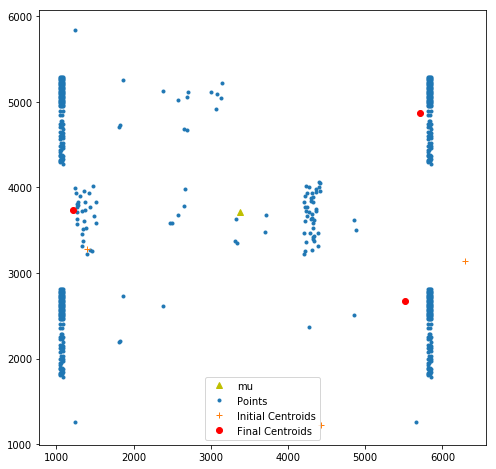

K: 3 Experiment: 0 Deviation: 0.05250743807794272 CPU_usage: 0.2975890636444092
--------------------


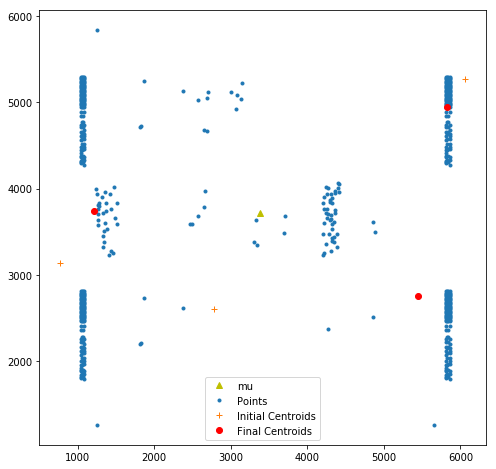

K: 3 Experiment: 1 Deviation: 0.053143726662471455 CPU_usage: 0.2692384719848633
--------------------


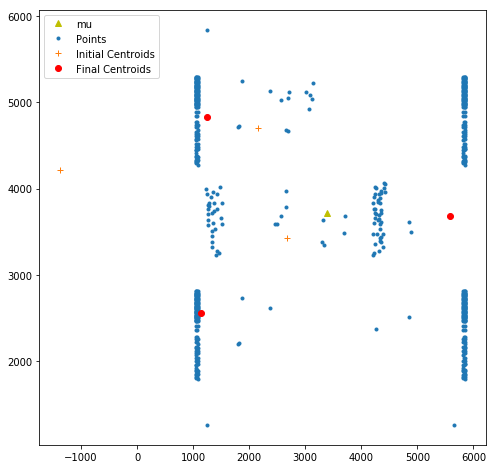

K: 3 Experiment: 2 Deviation: 0.02518317235665794 CPU_usage: 0.269503116607666
--------------------


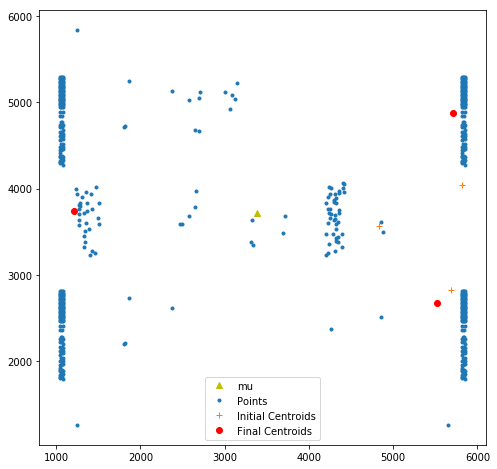

K: 3 Experiment: 3 Deviation: 0.05250743807794272 CPU_usage: 0.31762123107910156
--------------------


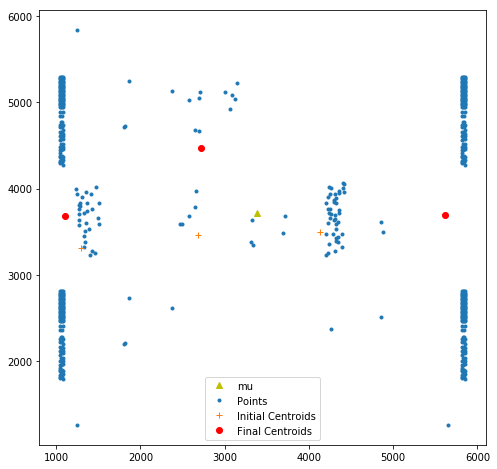

K: 3 Experiment: 4 Deviation: 0.4356415474584086 CPU_usage: 0.21688628196716309
--------------------


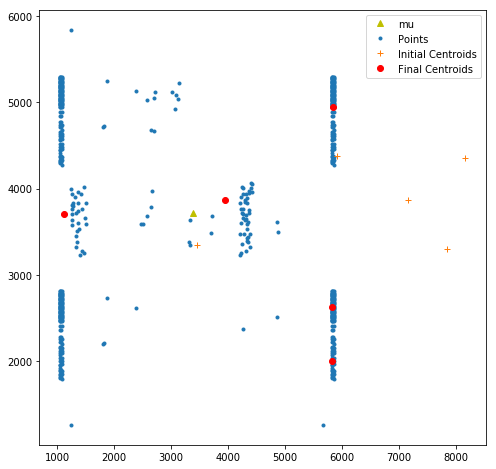

K: 5 Experiment: 0 Deviation: 1.2284315293435537 CPU_usage: 0.3559257984161377
--------------------


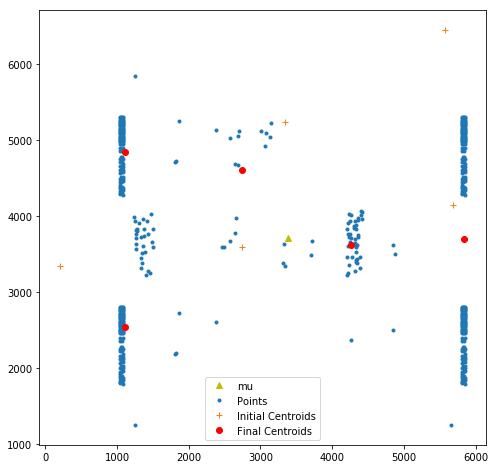

K: 5 Experiment: 1 Deviation: 1.3008189890411366 CPU_usage: 0.3635730743408203
--------------------


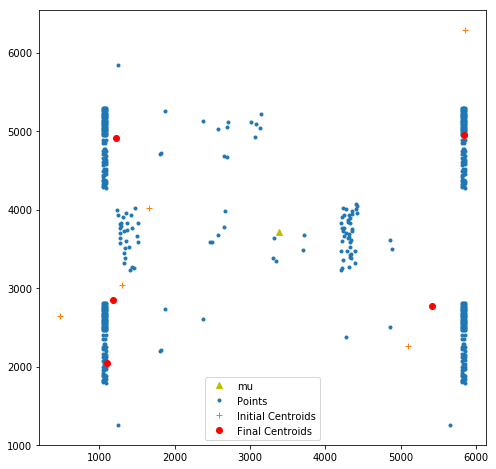

K: 5 Experiment: 2 Deviation: 0.5247406328597428 CPU_usage: 0.28458642959594727
--------------------


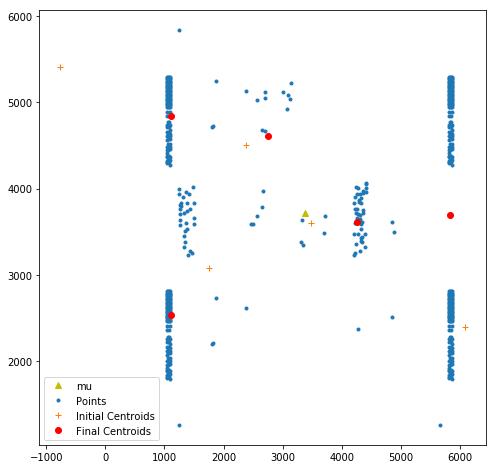

K: 5 Experiment: 3 Deviation: 1.3008189890411366 CPU_usage: 0.301072359085083
--------------------


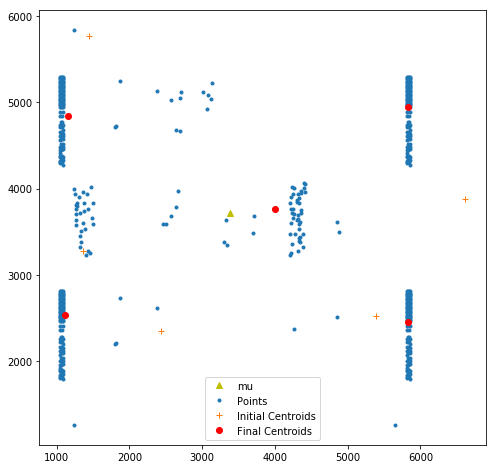

K: 5 Experiment: 4 Deviation: 0.08974225861900453 CPU_usage: 0.3653371334075928
--------------------


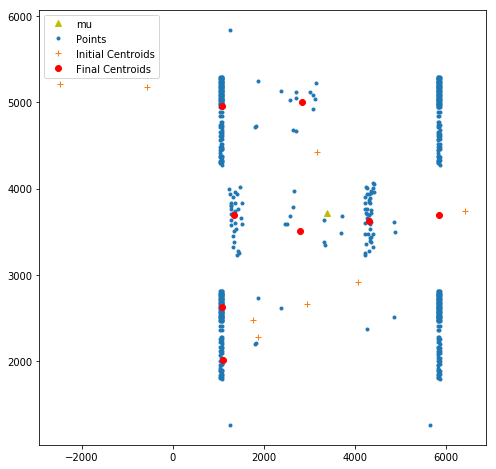

K: 8 Experiment: 0 Deviation: 1.8999585505932566 CPU_usage: 0.47463202476501465
--------------------


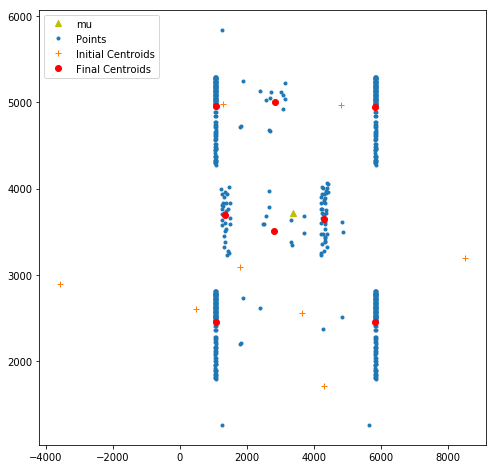

K: 8 Experiment: 1 Deviation: 0.15961711178490787 CPU_usage: 0.40449047088623047
--------------------


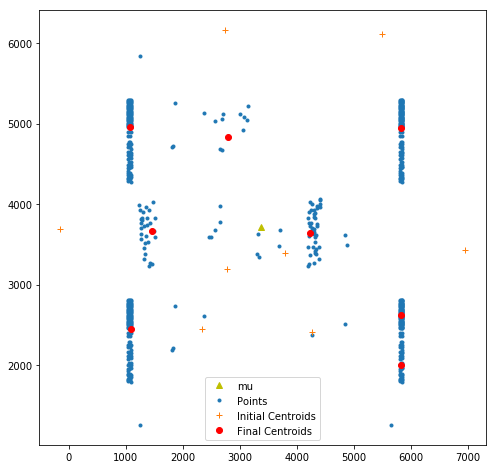

K: 8 Experiment: 2 Deviation: 0.07638125285263252 CPU_usage: 0.39116549491882324
--------------------


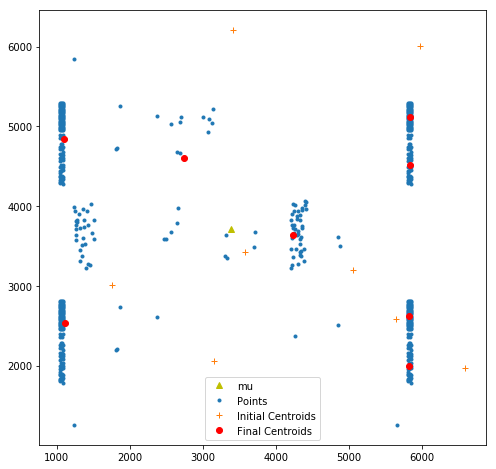

K: 8 Experiment: 3 Deviation: 0.1415994613844394 CPU_usage: 0.46028637886047363
--------------------


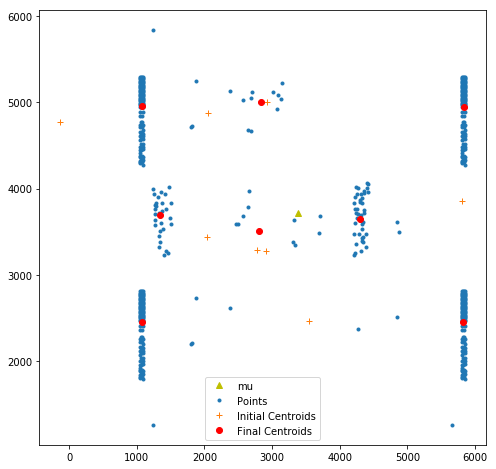

K: 8 Experiment: 4 Deviation: 0.15961711178490787 CPU_usage: 0.43433237075805664
--------------------


In [148]:
opt_costs = [551062.8811,209068.7935,147050.7904]
ks = [3,5,8]
for i in range(3):
    k = ks[i]
    opt_cost = opt_costs[i]
    for j in range(5):
        start = time.time()
        cost = k_menas(data,k)
        cpu_usage = (time.time()-start)
        dev = (cost - opt_cost)/opt_cost
        print("K:",k,"Experiment:",j,"Deviation:",dev,'CPU_usage:',cpu_usage)
        print("--------------------")
